In [24]:
%tensorflow_version 1.x

In [25]:
import tensorflow as tf
import numpy as np

In [26]:
tf.__version__

'1.15.2'

### TF Graph

In [27]:
np.random.seed(101)
tf.set_random_seed(101)

In [28]:
rand_a = np.random.uniform(0, 100, (5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [29]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

### Placeholder

In [30]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations

In [31]:
add_op = a + b
mult_op = a * b

In [32]:
with tf.Session() as sess:
  add_result = sess.run(add_op, feed_dict={a: rand_a, b:rand_b})
  print(add_result)

  print("\n")
  mult_result = sess.run(mult_op, feed_dict={a: rand_a, b:rand_b})
  print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


### Example Neural Network

In [33]:
n_features = 10
n_dense_network = 3

In [34]:
# Placeholder for x
x = tf.placeholder(tf.float32, shape=(None, n_features))

In [35]:
# Variables for w and b
b = tf.Variable(tf.zeros(n_dense_network))
w = tf.Variable(tf.random_normal([n_features, n_dense_network]))

*** Operation Activation Function ***

In [36]:
xW = tf.matmul(x, w)

In [37]:
z = tf.add(xW, b)

In [38]:
a = tf.sigmoid(z)

Variable initializer

In [39]:
init = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
  sess.run(init)

  layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})

In [41]:
print(layer_out)

[[0.00358296 0.8974064  0.77842164]]


# Simple Regression Example

In [42]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [43]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [44]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

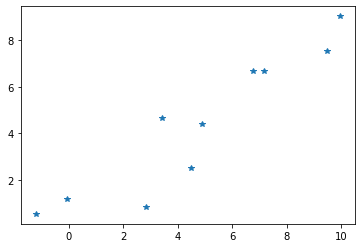

In [46]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_label, '*')

y = mx + b

In [47]:
np.random.rand(2)

array([0.44236813, 0.87758732])

In [48]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [49]:
error = 0

for x, y in zip(x_data, y_label):
  y_hat = m*x + b

  error += (y - y_hat)**2

In [50]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [51]:
init = tf.global_variables_initializer()

In [54]:
with tf.Session() as sess:
  sess.run(init)
  training_step =100 
  for i in range(training_step):
    sess.run(train)
  
  final_slope, final_intercept = sess.run([m, b])

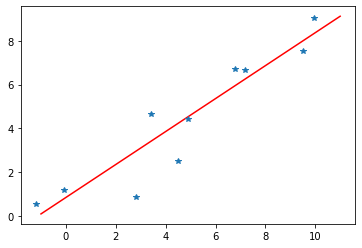

In [55]:
x_test = np.linspace(-1, 11, 10)

# y = mx + c
y_pred_plot = final_slope * x_test + final_intercept
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')